# 데이터 가져오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

x_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Weather Project/electric_train.csv')
x_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Weather Project/electric_test.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import warnings
#warnings.filterwarnings('ignore')

In [4]:
#기상에 따른 공동주택 전력 수요 예측 개선
#학습데이터(전력)
#TM 날짜
#HH24 시간 1~24, 5시 == 4시 1분~5시 00분 전력부하
#weekday 요일  월 0 ~ 일 6
#week_name 주중 0 주말 1
#SUM_QCTR 계약전력합계 해당격자의 전력통계 산출에 포함된 공동주택의 계약전력 합계
#N 공동주택수 공도주택의 수, 단위(단지)
#SUM_LOAD 전력수요합계 해당격자/시각에 측정된 공동주택의 전력수요 합계
#N_MEAN_LOAD 전력부하량 평균 격자내 총 전력부하량을 아파트 수로 나누어 격자의 평균 부하량을 산출
#elec 전력기상지수 해당격자의 공동주택의 연평균 부하량을 100으로 했을 때,
#해당 시작에 예상되는 부하량을 상대적인 수치로 표현

In [ ]:
#학습데이터(기상)
#AWS, 해상기상부이, 등표 관측 자료에서 지형효과 반영 3차원 객관분석 기법을 적용하여
#격자 형태로 생산한 분석자료(객관분석)
#NUM 기상청 동네예보 격자넘버
#STN AWS 지정 번호
#nph_to 객관분석기온 단위 C
#nph_hm 객관분석상대습도 , 단위 %
#nph_ws_10m 객관분석 10분 평균 풍속, 단위 m/s
#nph_m_60m 객관분석강수량 1시간 누적 강수량 단위mm
#nph_ta_chi 객관분석 체감온도, 단위C

In [ ]:
#검증데이터 electric_test.csv

#NUM 기상청 동네예보 격자넘버

#TM 날짜
#HH24 시간 1~24, 5시 == 4시 1분~5시 00분 전력부하
#weekday 요일  월 0 ~ 일 6
#week_name 주중 0 주말 1


#STN AWS 지정 번호
#nph_to 객관분석기온 단위 C
#nph_hm 객관분석상대습도 , 단위 %
#nph_ws_10m 객관분석 10분 평균 풍속, 단위 m/s
#nph_m_60m 객관분석강수량 1시간 누적 강수량 단위mm
#nph_ta_chi 객관분석 체감온도, 단위C


#이하 예측이 필요한 부분
#SUM_QCTR 계약전력합계 해당격자의 전력통계 산출에 포함된 공동주택의 계약전력 합계
#N 공동주택수 공도주택의 수, 단위(단지)
#SUM_LOAD 전력수요합계 해당격자/시각에 측정된 공동주택의 전력수요 합계
#N_MEAN_LOAD 전력부하량 평균 격자내 총 전력부하량을 아파트 수로 나누어 격자의 평균 부하량을 산출
#elec 전력기상지수 해당격자의 공동주택의 연평균 부하량을 100으로 했을 때,
#해당 시작에 예상되는 부하량을 상대적인 수치로 표현

In [ ]:
# 분석주제 : 기상에 따른 공동주택 전력수요 예측 개선
# (1) 기상변수 및 공공데이터 등 활용 공동주택 전력수요 증감 영향 요인 분석
# (2) 계절, 지역에 따른 모델 세분화를 통한 공동주택 전력 수요 예측(=전력기상지수) 최적모델 개발

#전력기상지수 : 기상변화에 따른 지역별 공동주택의 예상되는 전력부하 변화를
#기상예보처럼 국민들이 쉽게 인지할 수 있도록 수치화하여 예측해주는 서비스
# 최대 72h 예측해주는 서비스
#A격자 00시각의 전력기상지수  = A격자00시각의 전력수요(또는 예상 전력 수요) / A격자 해당년도 전시간 평균 전력 수요
#활용법: 전일 최고 전력기상지수가 100, 당일최고전력기상지수 125
# 125/100 = 1.25배 (25%증가예상)

#기상 데이터: 고해상도 기상관측 격자 자료
#전력 데이터 : 시간대별 전력 부하 합계, 단지수, 계약 전력 등
# 3일 이상 예측자료가 있는 기타 공공데이터를 콘테스트 참여자가 추가하여 분석 가능

#특정기온, 습도를 기점으로 급격히 증가하는 비선형적 관계
#전력수요는 주로 밤9시, 하계에는 시간대별 전력수요 변동폭이 큼

# 데이터 전처리

In [5]:
#결측값으로 간주할 값 목록
missing_values = [-99, -99.9, -999.0]

In [6]:
#결측값을 NaN으로 대체
x_train.replace(missing_values, np.nan, inplace=True)
x_test.replace(missing_values, np.nan, inplace=True)

In [7]:
#결측값 확인
x_train.isnull().sum()

Unnamed: 0                      0
electric_train.num              0
electric_train.tm               0
electric_train.hh24             0
electric_train.n                0
electric_train.stn              0
electric_train.sum_qctr         0
electric_train.sum_load         0
electric_train.n_mean_load      0
electric_train.nph_ta           0
electric_train.nph_hm           0
electric_train.nph_ws_10m     169
electric_train.nph_rn_60m       0
electric_train.nph_ta_chi       0
electric_train.weekday          0
electric_train.week_name        0
electric_train.elec             5
dtype: int64

In [8]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593355 entries, 0 to 7593354
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Unnamed: 0                  int64  
 1   electric_train.num          int64  
 2   electric_train.tm           object 
 3   electric_train.hh24         int64  
 4   electric_train.n            int64  
 5   electric_train.stn          int64  
 6   electric_train.sum_qctr     int64  
 7   electric_train.sum_load     float64
 8   electric_train.n_mean_load  float64
 9   electric_train.nph_ta       float64
 10  electric_train.nph_hm       float64
 11  electric_train.nph_ws_10m   float64
 12  electric_train.nph_rn_60m   float64
 13  electric_train.nph_ta_chi   float64
 14  electric_train.weekday      int64  
 15  electric_train.week_name    int64  
 16  electric_train.elec         float64
dtypes: float64(8), int64(8), object(1)
memory usage: 984.9+ MB


In [9]:
x_test.isnull().sum()

Unnamed: 0                   0
electric_test.num            0
electric_test.tm             0
electric_test.hh24           0
electric_test.stn            0
electric_test.nph_ta         0
electric_test.nph_hm         0
electric_test.nph_ws_10m    32
electric_test.nph_rn_60m    92
electric_test.nph_ta_chi     0
electric_test.weekday        0
electric_test.week_name      0
dtype: int64

In [10]:
x_train.head(5)

,Unnamed: 0,electric_train.num,electric_train.tm,electric_train.hh24,electric_train.n,electric_train.stn,electric_train.sum_qctr,electric_train.sum_load,electric_train.n_mean_load,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.weekday,electric_train.week_name,electric_train.elec
0,1,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
1,2,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
2,3,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
3,4,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
4,5,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73


In [11]:
x_test.head(5)

,Unnamed: 0,electric_test.num,electric_test.tm,electric_test.hh24,electric_test.stn,electric_test.nph_ta,electric_test.nph_hm,electric_test.nph_ws_10m,electric_test.nph_rn_60m,electric_test.nph_ta_chi,electric_test.weekday,electric_test.week_name
0,1,2385,2023-01-01 01:00:00,1,303,7.8,61.5,6.7,0.0,4.2,6,1
1,2,2385,2023-01-01 02:00:00,2,303,7.9,60.6,7.6,0.0,4.0,6,1
2,3,2385,2023-01-01 03:00:00,3,303,8.2,61.9,8.7,0.0,4.1,6,1
3,4,2385,2023-01-01 04:00:00,4,303,8.4,60.9,9.2,0.0,4.3,6,1
4,5,2385,2023-01-01 05:00:00,5,303,8.5,60.9,9.5,0.0,4.3,6,1


In [12]:
#날짜 데이터 타입으로 변경하기
x_train['electric_train.tm'] = pd.to_datetime(x_train['electric_train.tm'])
x_train['electric_train.tm'] = pd.to_datetime(x_train['electric_train.tm'],format='%Y-%m-%d %H')

#년 월 일 컬럼 추가
x_train['Year'], x_train['Month'], x_train['Day'] = x_train['electric_train.tm'].dt.year, x_train['electric_train.tm'].dt.month, x_train['electric_train.tm'].dt.day


In [13]:
#날짜 데이터 타입으로 변경하기
x_test['electric_test.tm'] = pd.to_datetime(x_test['electric_test.tm'])
x_test['electric_test.tm'] = pd.to_datetime(x_test['electric_test.tm'],format='%Y-%m-%d %H')

#년 월 일 컬럼 추가
x_test['Year'], x_test['Month'], x_test['Day'] = x_test['electric_test.tm'].dt.year, x_test['electric_test.tm'].dt.month, x_test['electric_test.tm'].dt.day


In [14]:
#컬럼 이름 변경


x_train = x_train.rename(columns = {'electric_train.hh24':'hh24',
                          'electric_train.stn':'stn',
                          'electric_train.nph_ta':'temp',
                          'electric_train.nph_hm':'humi',
                          'electric_train.nph_ws_10m':'wind',
                          'electric_train.nph_rn_60m':'rain',
                          'electric_train.nph_ta_chi':'chill',
                          'electric_train.weekday':'weekday',
                          'electric_train.week_name':'weekend'
                          })


x_test = x_test.rename(columns = {'electric_test.hh24':'hh24',
                          'electric_test.stn':'stn',
                          'electric_test.nph_ta':'temp',
                          'electric_test.nph_hm':'humi',
                          'electric_test.nph_ws_10m':'wind',
                          'electric_test.nph_rn_60m':'rain',
                          'electric_test.nph_ta_chi':'chill',
                          'electric_test.weekday':'weekday',
                          'electric_test.week_name':'weekend'
                          })

In [15]:
x_train['hh24'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

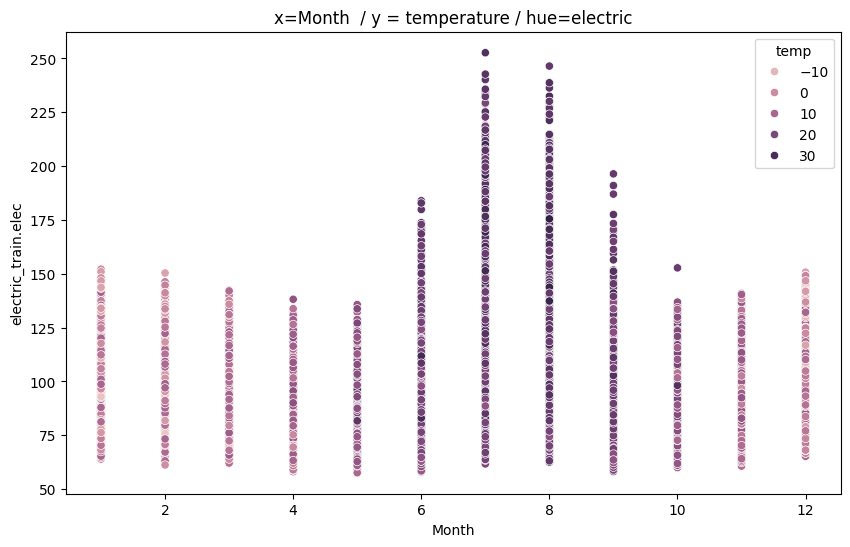

In [16]:
#시각화

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# 큰 데이터셋 샘플링
sampled_x = x_train.sample(n=20000)  # 예: 1000개 샘플링

# 샘플링한 데이터로 시각화
plt.figure(figsize=(10, 6))

#산점도
sns.scatterplot(x='Month', y='electric_train.elec', data=sampled_x, hue='temp')
plt.title('x=Month  / y = temperature / hue=electric')
plt.show()

<Axes: xlabel='electric_train.tm', ylabel='electric_train.elec'>

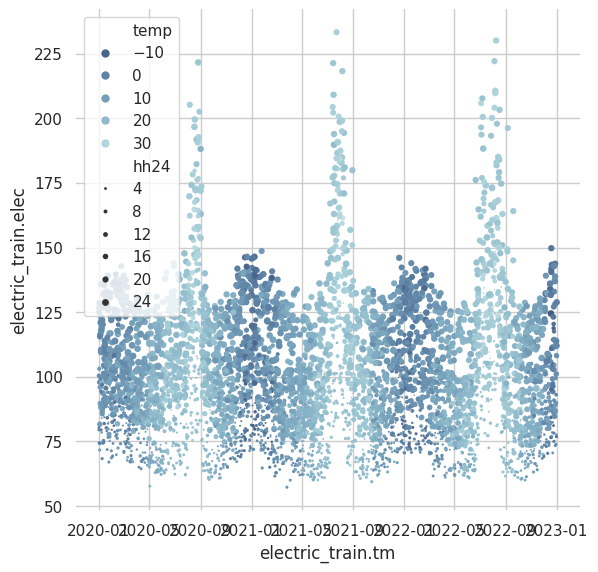

In [17]:
#Scatterplot with multiple semantics

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# 큰 데이터셋 샘플링
sampled_x = x_train.sample(n=5000)  # 예: 1000개 샘플링

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
sns.scatterplot(x="electric_train.tm", y="electric_train.elec",
                hue="temp", size="hh24",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 24), linewidth=0,
                data=sampled_x, ax=ax)

<ipython-input-34-50367e13c1c5>:13: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.relplot(


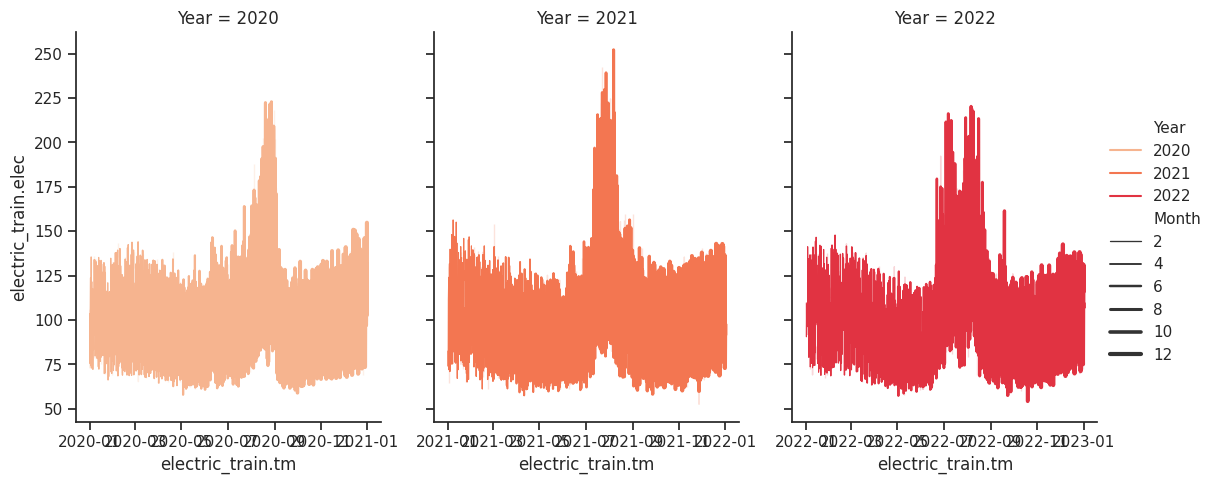

In [34]:
#Line plots on multiple facets
import seaborn as sns

# 큰 데이터셋 샘플링
sampled_x = x_train.sample(n=10000)  # 예: 1000개 샘플링

sns.set_theme(style="ticks")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=sampled_x,
    x="electric_train.tm", y="electric_train.elec",
    hue="Year", size="Month", col="Year",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

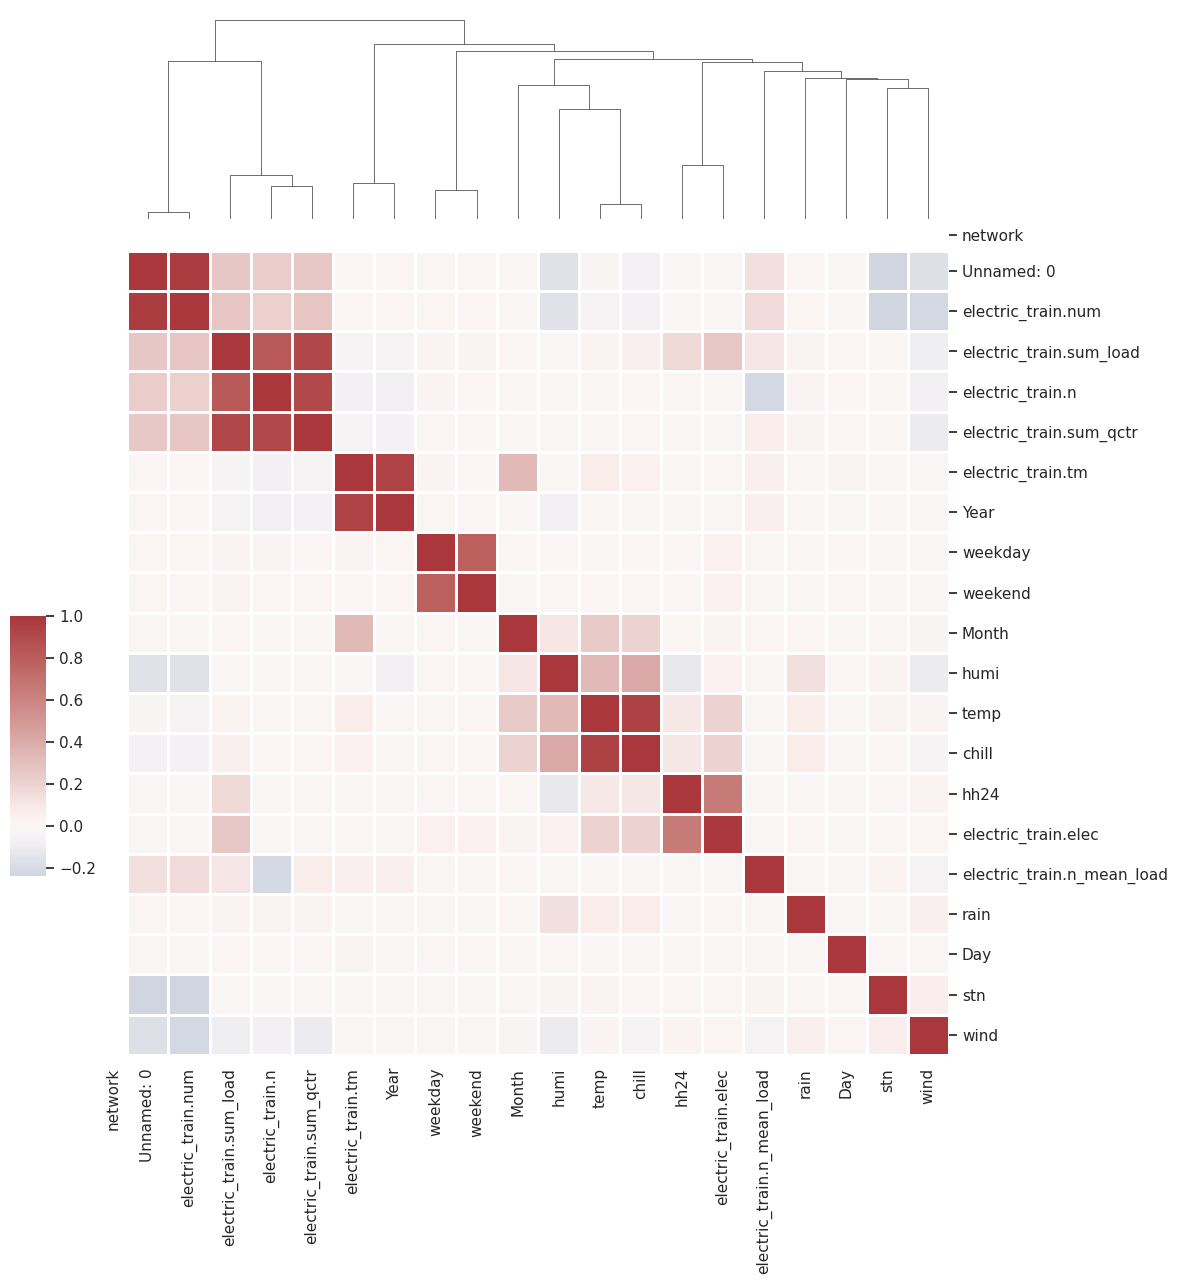

In [40]:
#Discovering structure in heatmap data

import pandas as pd
import seaborn as sns
sns.set_theme()

# 큰 데이터셋 샘플링
sampled_x = x_train.sample(n=10000)  # 예: 1000개 샘플링

# Load the brain networks example dataset
df = sampled_x

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]


# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix



# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()




In [59]:
x_train.head(5)

,Unnamed: 0,electric_train.num,electric_train.tm,electric_train.hh24,electric_train.n,electric_train.stn,electric_train.sum_qctr,electric_train.sum_load,electric_train.n_mean_load,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.weekday,electric_train.week_name,electric_train.elec,Year,Month,Day
0,1,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56,2021,1,1
1,2,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78,2021,1,1
2,3,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17,2021,1,1
3,4,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34,2021,1,1
4,5,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73,2021,1,1


In [61]:
x_test.head(5)

,Unnamed: 0,electric_test.num,electric_test.tm,electric_test.hh24,electric_test.stn,electric_test.nph_ta,electric_test.nph_hm,electric_test.nph_ws_10m,electric_test.nph_rn_60m,electric_test.nph_ta_chi,electric_test.weekday,electric_test.week_name,Year,Month,Day
0,1,2385,2023-01-01 01:00:00,1,303,7.8,61.5,6.7,0.0,4.2,6,1,2023,1,1
1,2,2385,2023-01-01 02:00:00,2,303,7.9,60.6,7.6,0.0,4.0,6,1,2023,1,1
2,3,2385,2023-01-01 03:00:00,3,303,8.2,61.9,8.7,0.0,4.1,6,1,2023,1,1
3,4,2385,2023-01-01 04:00:00,4,303,8.4,60.9,9.2,0.0,4.3,6,1,2023,1,1
4,5,2385,2023-01-01 05:00:00,5,303,8.5,60.9,9.5,0.0,4.3,6,1,2023,1,1


In [62]:
#결측치가 있는 행 삭제

x_train = x_train.dropna()
x_test = x_test.dropna()


In [63]:
y_train = x_train['electric_train.elec']

In [64]:
y_train

0           99.56
1           91.78
2           79.17
3           73.34
4           69.73
            ...  
7593350    130.74
7593351    131.18
7593352    129.33
7593353    122.57
7593354    115.12
Name: electric_train.elec, Length: 7593181, dtype: float64

In [65]:
#필요없는 열 삭제

x_train.drop(columns = ['Unnamed: 0'], inplace=True)
x_train.drop(columns = ['electric_train.num'], inplace=True)
x_train.drop(columns = ['electric_train.tm'], inplace=True)
x_train.drop(columns = ['electric_train.n'], inplace=True)
x_train.drop(columns = ['electric_train.sum_qctr'], inplace=True)
x_train.drop(columns = ['electric_train.sum_load'], inplace=True)
x_train.drop(columns = ['electric_train.n_mean_load'], inplace=True)
x_train.drop(columns = ['electric_train.elec'], inplace=True)


x_test.drop(columns = ['Unnamed: 0'], inplace=True)
x_test.drop(columns = ['electric_test.num'], inplace=True)
x_test.drop(columns = ['electric_test.tm'], inplace=True)

<ipython-input-65-bd2873cbaac7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop(columns = ['Unnamed: 0'], inplace=True)
<ipython-input-65-bd2873cbaac7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop(columns = ['electric_train.num'], inplace=True)
<ipython-input-65-bd2873cbaac7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop(columns = ['electric_train.tm'], inplace=True)
<ipython-input-65-bd28

In [ ]:
#각 컬럼 최빈값 구하기
mode_values1 = x_train.mode().iloc[0]
mode_values2 = x_test.mode().iloc[0]

#결측값을 최빈값으로 채우기
x_train = x_train.fillna(mode_values1)
x_test = x_test.fillna(mode_values2)

print(x_train.isnull().sum())
print(x_test.isnull().sum())

hh24          0
stn           0
nph_ta        0
nph_hm        0
nph_ws_10m    0
nph_rn_60m    0
nph_ta_chi    0
weekday       0
week_name     0
dtype: int64
electric_test.hh24          0
electric_test.stn           0
electric_test.nph_ta        0
electric_test.nph_hm        0
electric_test.nph_ws_10m    0
electric_test.nph_rn_60m    0
electric_test.nph_ta_chi    0
electric_test.weekday       0
electric_test.week_name     0
dtype: int64


In [67]:
x_train.shape

(7593181, 12)

In [68]:
x_test.shape

(2838143, 12)

In [69]:
y_train.shape

(7593181,)

In [ ]:
#정규화
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler

#최소최대정규화
#scaler = MinMaxScaler()
#x_train['electric_test.nph_hm'] = scaler.fit_transform(x_train[['electric_test.nph_hm']])
#x_test['electric_test.nph_hm'] = scaler.fit_transform(x_test[['electric_test.nph_hm']])

#표준정규화
#scaler = StandardScaler()
#x_train[['', '']] = scaler.fit_transform(x_train[['', '']])
#x_test[['', '']] = scaler.fit_transform(x_test[['', '']])




# 데이터 모델링

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size  = 0.2, random_state = 29)

print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7593181, 12)
X_test shape: (2838143, 12)
y_train shape: (6074544,)
y_test shape: (1518637,)


In [71]:
from sklearn.model_selection import train_test_split

# 전체 데이터와 타겟 데이터를 합칩니다.
X_all = np.concatenate((X_train, X_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

# 데이터를 재분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# 결과 출력
print(f"New X_train shape: {X_train.shape}")
print(f"New y_train shape: {y_train.shape}")
print(f"New X_test shape: {X_test.shape}")
print(f"New y_test shape: {y_test.shape}")

New X_train shape: (6074544, 12)
New y_train shape: (6074544,)
New X_test shape: (1518637, 12)
New y_test shape: (1518637,)


In [72]:
#다중선형회귀모델

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_predictions = linear_model.predict(x_test)[:1518637]


linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)


print("Mean Absolute Error (MAE): ", linear_mae)
print("Mean Squared Error (MSE): ", linear_mse)
print("R-squared (R²):", linear_r2)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Mean Absolute Error (MAE):  23.755628738405903
Mean Squared Error (MSE):  922.2687370122039
R-squared (R²): -0.45868351751056347


In [ ]:
#결정트리

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

tree_model = DecisionTreeRegressor(random_state = 42)
tree_model.fit(X_train, y_train)

tree_predictions  = tree_model.predict(x_test)[:1518637]

#예측결과
tree_mae = mean_absolute_error(y_test, tree_predictions)


print("Tree MAE :",tree_mae)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Tree MAE : 27.965471191711167


In [ ]:
#랜덤포레스트

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

# 모델 훈련
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)

for i in tqdm(range(1, rf_model.n_estimators + 1), desc="Training Progress"):
  rf_model.n_estimators = i
  rf_model.fit(X_train, y_train)

# 예측 수행
rf_predictions = rf_model.predict(x_test)[:1518637]

# 성능 평가
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest MAE:", rf_mae)
print("Random Forest MSE:", rf_mse)
print("Random Forest R2:", rf_r2)


Training Progress:  70%|███████   | 7/10 [36:42<20:25, 408.44s/it]

In [ ]:
#딥러닝

import seaborn as sns

from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(128, activation = 'relu', input_shape = (26,)))
model.add(keras.layers.Dense(256, activation = 'relu', input_shape = (26,)))
model.add(keras.layers.Dense(64, activation = 'relu', input_shape = (26,)))
model.add(keras.layers.Dense(1))
model.sumamary()

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = model.fit(train_input, train_target, epochs = 50)

history


In [ ]:
test_loss_score, test_mae_score = model.evaluate(test_input, test_target)

In [ ]:
#모델 평가

from sklearn.metrics import r2_score

r2 = r2_score(test_target, model.predict(test_input))
r2

In [ ]:

import matplotlib.pyplot as plt

plt.scatter(test_target, model.predict(test_input))
plt.xlabel('test_target')
plt.ylabel('predict')
plt.show()

In [ ]:
plt.plot(history.history['mae'])
plt.xlabel('epochs')
plt.ylabel('mae') #평균절대오차
plt.show()